# Uvod #

Do sada smo naučili kako neuronske mreže mogu riješiti probleme regresije. Sada ćemo primijeniti neuronske mreže na još jedan uobičajeni problem strojnog učenja: klasifikaciju. Većina svega što smo naučili do sada još uvijek vrijedi. Glavna razlika je u funkciji gubitaka koju koristimo i u vrsti rezultata koje želimo da proizvede završni sloj.

# Binarna klasifikacija #

Klasifikacija u jednu od dvije klase čest je problem strojnog učenja. Možda biste željeli predvidjeti hoće li kupac nešto kupiti, je li transakcija s kreditnom karticom bila lažna, pokazuju li signali dubokog svemira dokaze o novom planetu ili medicinski test dokaz bolesti. Sve su to problemi **binarne klasifikacije**.

U vašim neobrađenim podacima, klase mogu biti predstavljene nizovima kao što su `"Da"` i `"Ne"`, ili `"Pas"` i `"Mačka"`. Prije upotrebe ovih podataka dodijelit ćemo **oznaku klase**: jedna klasa će biti `0`, a druga `1`. Dodjeljivanje numeričkih oznaka stavlja podatke u oblik koji neuronska mreža može koristiti.

# Accuracy i Cross-entropy #

**Accuracy** je jedna od mnogih metrika koje se koriste za mjerenje uspjeha kod problema klasifikacije. Točnost je omjer točnih predviđanja i ukupnih predviđanja: `točnost = broj_točnih / ukupno`. Model koji je uvijek točno predviđao imao bi ocjenu točnosti "1,0". Ako su svi ostali jednaki, točnost je razumna metrika za korištenje kad god se klase u skupu podataka pojavljuju s približno istom učestalošću.

Problem s točnošću (i većinom drugih klasifikacijskih metrika) je taj što se ne može koristiti kao funkcija gubitka (loss). SGD treba funkciju gubitka koja se glatko mijenja, ali se točnost, budući da je omjer brojanja, mijenja u "skokovima". Dakle, moramo odabrati zamjenu koja će djelovati kao funkcija gubitka. Ova zamjena je *cross-entropy* funkcija.

Sada se prisjetimo da funkcija gubitka definira *cilj* mreže tijekom treninga. S regresijom, naš je cilj bio minimizirati udaljenost između očekivanog ishoda i predviđenog ishoda. Odabrali smo MAE za mjerenje ove udaljenosti.

Za klasifikaciju, ono što umjesto toga želimo je udaljenost između *vjerojatnosti*, a to je ono što omogućuje cross-entropy. **Cross-entropy** je neka vrsta mjere za udaljenost od jedne distribucije vjerojatnosti do druge.

<figure style="padding: 1em;">
<img src="figs/DwVV9bR.png" width="400" alt="Graphs of accuracy and cross-entropy.">
<figcaption style="textalign: center; font-style: italic"><center>Unakrsna entropija kažnjava netočna predviđanja vjerojatnosti.</center></figcaption>
</figure>

Ideja je da želimo da naša mreža predvidi točnu klasu s vjerojatnošću `1.0`. Što je predviđena vjerojatnost dalje od "1.0", to će veći biti cross-entropy loss.

Tehnički razlozi zbog kojih koristimo cross-entropy su pomalo suptilni, ali glavna stvar koju treba izdvojiti iz ovog odjeljka je upravo ovo: koristite cross-entropy za gubitak klasifikacije; druge metrike do kojih bi vam moglo biti stalo (poput Accuracy-a) težit će poboljšanju zajedno s njim.

# Izrada vjerojatnosti pomoću sigmoidne funkcije #

Funkcije cross-entropy i funkcije Accuracy-a zahtijevaju vjerojatnosti kao ulaze, što znači brojeve od 0 do 1. Kako bismo prikrili izlaze stvarne vrijednosti koje proizvodi gusti sloj u vjerojatnosti, pridajemo novu vrstu aktivacijske funkcije, **sigmoidnu aktivaciju **.

<figure style="padding: 1em;">
<img src="figs/FYbRvJo.png" width="400" alt="The sigmoid graph is an 'S' shape with horizontal asymptotes at 0 to the left and 1 to the right. ">
<figcaption style="textalign: center; font-style: italic"><center>Sigmoidna funkcija preslikava realne brojeve u interval $[0, 1]$.</center></figcaption>
</figure>

Da bismo dobili konačno predviđanje klase, definiramo *prag* vjerojatnosti. Obično će to biti 0,5, tako da će nam zaokruživanje dati ispravnu klasu: ispod 0,5 znači klasu s oznakom 0, a 0,5 ili iznad znači klasu s oznakom 1. Prag od 0,5 je ono što Keras koristi prema zadanim postavkama sa svojim [accuracy metric](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).

# Primjer - binarna klasifikacija #

Idemo sada isprobati!

Skup podataka [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) sadrži značajke dobivene iz radarskih signala usmjerenih na sloj ionosfere Zemljine atmosfere. Zadatak je utvrditi pokazuje li signal prisutnost nekog predmeta ili samo prazan zrak.

In [1]:

import pandas as pd
from IPython.display import display

ion = pd.read_csv('./input/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


Definirat ćemo naš model baš kao što smo to učinili za regresijske zadatke, s jednom iznimkom. U završnom sloju uključite `'sigmoidnu'` aktivaciju tako da model proizvodi vjerojatnosti klase.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

c:\Users\A507\Desktop\Lab3_online\labs\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dodajte metriku cross-entropy loss i accuracy modelu pomoću njegove metode `compile`. Za probleme s dvije klase, svakako koristite `'binary'` verzije. (Problemi s više klasa bit će malo drugačiji.) Adamov optimizator također radi odlično za klasifikaciju, pa ćemo se držati njega.

In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Modelu u ovom konkretnom problemu može trebati dosta epoha da dovrši obuku, tako da ćemo uključiti rano zaustavljanje povratnog poziva radi praktičnosti.

In [4]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Pogledat ćemo krivulje učenja kao i uvijek, a također pregledati najbolje vrijednosti za gubitak i točnost koju smo dobili na setu za provjeru valjanosti. (Zapamtite da će rano zaustavljanje vratiti težine onima koji su dobili ove vrijednosti.)

Best Validation Loss: 0.2647
Best Validation Accuracy: 0.8762


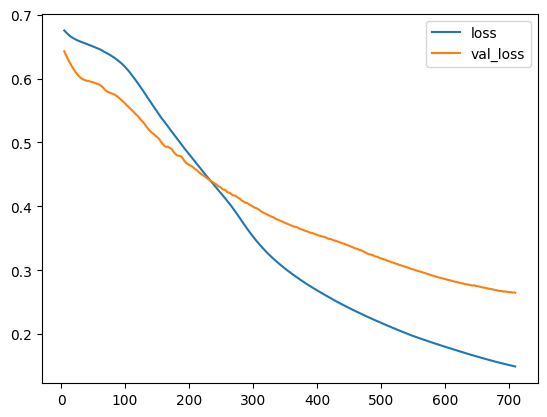

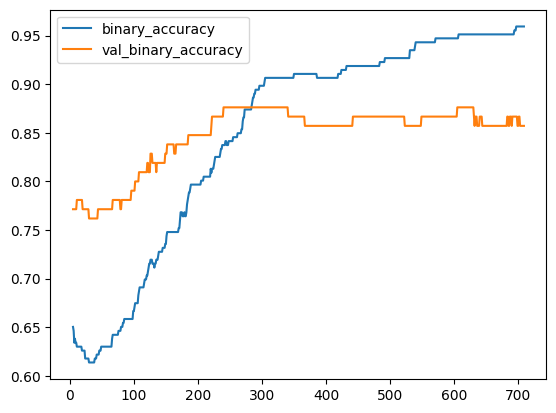

In [5]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

# Zadatak #

Koristite neuronsku mrežu za [**predviđanje otkazivanja hotelskih rezervacija**](Binary_Classification_exercise_hr.ipynb).